### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px ## Imported Plotly to get more


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [405]:
data = pd.read_csv('data/coupons.csv')
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [406]:
data.head()
# data.shape is giving 12684,26 columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [407]:
# Identify columns with missing values
null_columns = data.columns[data.isnull().any()].tolist()

print("Columns with null values:")
null_columns

null_counts = data[null_columns].isnull().sum()
print("\nTotal null values in each column:")
null_counts

Columns with null values:

Total null values in each column:


,0
car,12576
Bar,107
CoffeeHouse,217
CarryAway,151
RestaurantLessThan20,130
Restaurant20To50,189


In [408]:
# Count nulls in each identified column
null_counts = data[null_columns].isnull().sum()

print("\nTotal null values in each column:")
null_counts


Total null values in each column:


,0
car,12576
Bar,107
CoffeeHouse,217
CarryAway,151
RestaurantLessThan20,130
Restaurant20To50,189


3. Decide what to do about your missing data -- drop, replace, other...

In [409]:
# From my understanding, we can drop the car column as much of the data is not collected, and it's impractical to fill in that information
data = data.drop(columns=['car'])

# Now, let's verify the data that we left after that. Since the 'Bar' data is text-based, I am going to replace missing information with the mode.
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
# Similar to bar information, coffeehouse,RestaurantLessThan20, and Restaurant20To50 information is text- and context-based. I will replace missing information with the mode.data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [410]:
#(data['Y'] ==1).mean()
data['Y'].value_counts(normalize=True)
# Total Y =1 is 0.566433 and 0.431567 didnt accept the cupon

,proportion
Y,
1,0.568433
0,0.431567


5. Use a bar plot to visualize the `coupon` column.

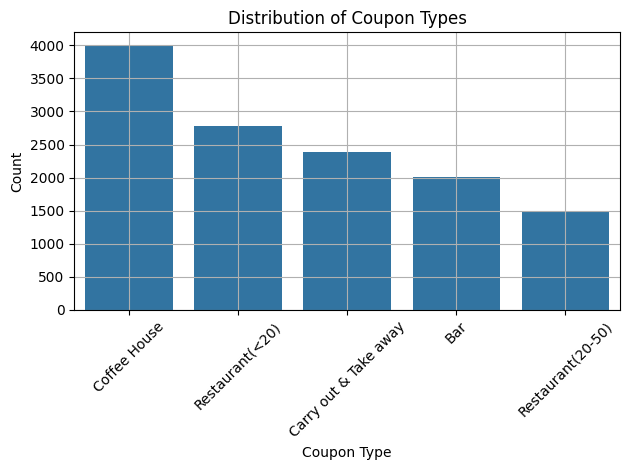

In [411]:
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index)

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.grid(True)
plt.tight_layout()
plt.show()

# Observation: Coffee House is highest

6. Use a histogram to visualize the temperature column.

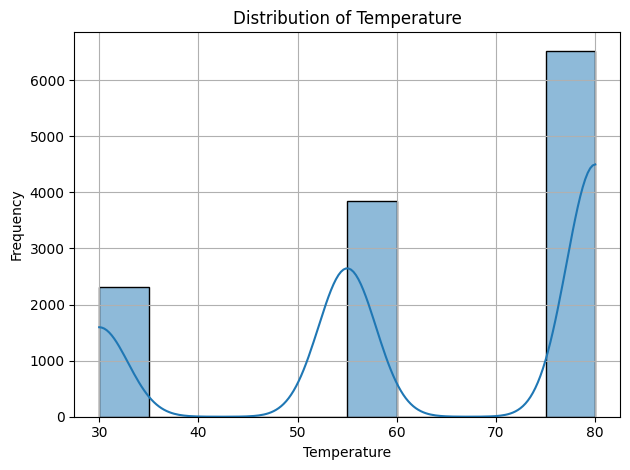

In [412]:
# Histogram of temperature
sns.histplot(data['temperature'], bins=10, kde=True)

plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [413]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

7. Cleaning up the data in columns by mapping the income and other column values to numeric values



In [414]:
# cleaning the income column
# setting the income map to numaric value
income_map = {
    'Less than $12500': 6000,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or More': 110000
}
# create new column income_numeric and assign the value
data['income_numeric'] = data['income'].map(income_map)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_numeric
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,1,43750
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,43750
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,43750
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,43750
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,43750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,1,81250
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,0,1,1,81250
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,81250
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,1,0,1,0,81250


In [415]:
# cleaning the age and assuming
data['age'].unique()
# function to convert the age to numric value
def convert_age(age_str):
    if pd.isna(age_str):
        return np.nan
    if age_str == 'below21':
        return 18
    elif age_str == '50plus':
        return 55
    else:
        try:
            return int(age_str)
        except ValueError:
            return np.nan
# create new column age_numeric and assign the value
data['age_numeric'] = data['age'].apply(convert_age)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_numeric,age_numeric
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,43750,21
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,43750,21
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,43750,21
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,43750,21
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,43750,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,1,81250,26
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,0,1,1,81250,26
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,0,81250,26
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,1,0,1,0,81250,26


In [416]:
# cleaning the Bar, RestaurantLessThan20, Restaurant20To50, CoffeeHouse, & CarryAway and assigning them to numeric values
# this will help me later to get the filters more easy
data['RestaurantLessThan20'].unique()
# map the RestaurantLessThan20 values to numeric
values_to_map = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}

data['RestaurantLessThan20_numeric'] = data['RestaurantLessThan20'].map(values_to_map)
data['Restaurant20To50_numeric'] = data['Restaurant20To50'].map(values_to_map)
data['Bar_numeric'] = data['Bar'].map(values_to_map)
data['CoffeeHouse_numeric'] = data['CoffeeHouse'].map(values_to_map)
data['CarryAway_numeric'] = data['CarryAway'].map(values_to_map)
data.columns = data.columns.str.lower() # converting all columns to lower case

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [417]:
dataFrame_Bar = data[data['coupon'] == 'Bar']
dataFrame_Bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,direction_same,direction_opp,y,income_numeric,age_numeric,restaurantlessthan20_numeric,restaurant20to50_numeric,bar_numeric,coffeehouse_numeric,carryaway_numeric
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,1,0,43750,21,6.0,2.0,0.0,0.0,2.0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1,0,1,43750,21,6.0,2.0,0.0,0.0,2.0
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,1,0,43750,21,6.0,2.0,0.0,0.0,2.0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,1,1,68750,21,6.0,0.5,0.0,0.5,6.0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,0,1,68750,21,6.0,0.5,0.0,0.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,0,1,0,81250,26,6.0,2.0,0.0,0.0,2.0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,0,1,0,81250,26,6.0,2.0,0.0,0.0,2.0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,0,1,0,81250,26,6.0,2.0,0.0,0.0,2.0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,0,1,0,81250,26,6.0,2.0,0.0,0.0,2.0


*2*. What proportion of bar coupons were accepted?


In [418]:
dataFrame_Bar['y'].value_counts(normalize=True)
# Total Y =1 0.410015 acceptance ratio of Bar Coupons

,proportion
y,
0,0.589985
1,0.410015


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


bar_category
High (>3)    0.768844
Low (≤3)     0.370737
Name: y, dtype: float64


/tmp/ipython-input-419-83311075.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



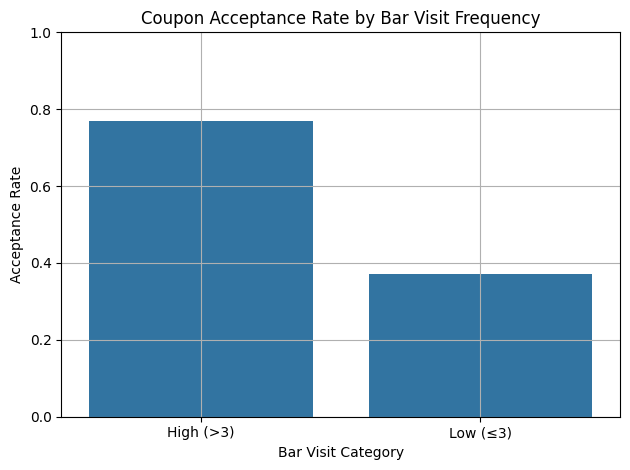

In [419]:
#Define bar frequency and in to groups and assing them to variables 'never','less1', '1~3' are lower_Bar category
# I am using Bar_numeric to easily compute

def categorize_bar_visits(value):
    if value <= 3:
        return 'Low (≤3)'
    elif value > 3:
        return 'High (>3)'
    else:
        return 'Unknown'
# create new column called bar_category
dataFrame_Bar['bar_category'] = dataFrame_Bar['bar_numeric'].apply(categorize_bar_visits)
dataFrame_Bar_filtered = dataFrame_Bar [dataFrame_Bar ['bar_category'] != 'Unknown']
# get the acceptance rate for bar cupon who went to bar 3 or more
acceptance_rates = dataFrame_Bar_filtered.groupby('bar_category')['y'].mean()
# 0.768844 (For >3 ) and 0.370737 for <=3
print(acceptance_rates)
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)

plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Category')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [420]:
# we need to categorize the bar that go's more than once and age above 25
# consider the 1~3 as 2 (mean) so i am including that in this group.
# I used age_numeric and Bar_numeric to filter the Age over 25 and Bar morthan 1

# query the age and bar over the age_group_below_25
data_age_over_25_bar_over_1 = dataFrame_Bar.query('age_numeric <= 25 and bar_numeric > 1')
other_category = dataFrame_Bar.query('not (age_numeric <= 25 and bar_numeric > 1)')

acceptance_rate_over_25_bar_over_1 = data_age_over_25_bar_over_1['y'].mean() # .67 acceptance rate

acceptance_rate_other_category = other_category['y'].mean() # ~.38 acceptance rate


comparison_df = pd.DataFrame({
    'Group': ['Bar >1/month & Age >25', 'Others'],
    'Acceptance Rate': [acceptance_rate_over_25_bar_over_1, acceptance_rate_other_category]
})

fig = px.bar(
    comparison_df,
    x='Group',
    y='Acceptance Rate',
    text=comparison_df['Acceptance Rate'],
    title='Coupon Acceptance Rate: Bar >1/month & Age >25 vs Others'
)

fig.show()
# Plot should show that the if age is greater than 25 and
# if person go's to bar more than once in month the acceptance rate is .67 that is 67 %

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [421]:
# 1. Define filters
not_agriculture_job = ['Farming','Fishing','Forestry']
passanger_kid = ['Kid(s)']

# create two different dataframes
bar_group_over1_without_kid_non_farming = dataFrame_Bar.query('bar_numeric > 1 and passanger not in @passanger_kid and occupation not in @not_agriculture_job')
bar_group_other_category = dataFrame_Bar.query('not (bar_numeric > 1 and passanger not in @passanger_kid and occupation not in @not_agriculture_job)')


# Calculate acceptance rates
accept_target = bar_group_over1_without_kid_non_farming['y'].mean() #.71
accept_others = bar_group_other_category['y'].mean() #.29

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Group': ['Bar >1/mo + No Kid + Non-Farming', 'Others'],
    'Acceptance Rate': [accept_target, accept_others]
})


print(comparison_df)

# plot to show the acceptance rate
fig = px.bar(
    comparison_df,
    x='Group',
    y='Acceptance Rate',
    text=comparison_df['Acceptance Rate'],
    title='Coupon Acceptance Rate: Bar >1/month & Age >25 vs Others'
)

fig.show()
# acceptance rate is .71 that is 71% when driver go's to bar more
# than once and dont have kid pasanger and had occupations other than farming, fishing, or forestry

                              Group  Acceptance Rate
0  Bar >1/mo + No Kid + Non-Farming         0.713249
1                            Others         0.296044


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [422]:

# lets define a these conditions as 3 different groups
# Group a = go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_a_df = dataFrame_Bar.query(
    "bar_numeric > 1 and passanger != 'Kid(s)' and maritalstatus != 'Widowed'"
)

# Group b = go to bars more than once a month and are under the age of 30

group_b_df = dataFrame_Bar.query("bar_numeric > 1 and age_numeric < 30")

# Group c = go to cheap restaurants more than 4 times a month and income is less than 50K.
group_c_df = dataFrame_Bar.query(
    "restaurantlessthan20_numeric > 4 and income_numeric < 50000"
)

# combine all the data frames and drop duplicates
combined_df = pd.concat([group_a_df, group_b_df, group_c_df]).drop_duplicates()

accept_rate_combined = combined_df['y'].mean()
accept_rate_others = dataFrame_Bar[~dataFrame_Bar.index.isin(combined_df.index)]['y'].mean()
# Acceptance rate is .5889 to .2981

print(f"Combined group acceptance rate: {accept_rate_combined}")
print(f"Other group acceptance rate: {accept_rate_others}")
comparison_df = pd.DataFrame({
    'Group': ['Satisfies any condition (A, B, C)', 'Others'],
    'Acceptance Rate': [accept_rate_combined, accept_rate_others]
})

fig = px.bar(
    comparison_df,
    x='Group',
    y='Acceptance Rate',
    text=comparison_df['Acceptance Rate'],
    title='Coupon Acceptance Rate: Condition A/B/C vs Others'
)

fig.show()

Combined group acceptance rate: 0.5889175257731959
Other group acceptance rate: 0.29814665592264306


7.  Based on these observations, what do you hypothesize about  drivers who accepted the bar coupons?

Observations: the acceptance rate for the categories listed below is high for bar coupons if

1. Divers who go to bars more than once per month and dont have a Kid's passenger and were not widowed
2. Drivers who are less than 30 years old and frequent bar-goers
3. Frequent fast food eater with income <$50k.
4. Frequent bar goers who are non-farmers or armed, fishing, or forestry.
5. Destination "No Urgent Place" has a high acceptance rate.
6. Marital Status "Single" and "Married partner" have the highest coupon acceptance rate.
7. Occupation highest is "Student", "Unemployed" and "Computer Mathematical" have highest acceptance rate.
8. Sunny weather has the highest acceptance rate.
9. 6 PM and 10 PM are the top coupons that have the highest acceptance rate for Bar Coupons



8. Pairwise Scatter Plot for Bar Cupon

In [423]:

fig = px.scatter_matrix(
    dataFrame_Bar,
    dimensions=["age_numeric", "income_numeric", "bar_numeric"],
    color="y",
    title="Pairwise Scatter Matrix For Bar Cupons: Age, Income, Bar Visits vs Coupon Acceptance",
    labels={
        "age_numeric": "Age",
        "income_numeric": "Income",
        "bar_numeric": "Bar Visits",
        "Y": "Accepted Coupon"
    },
    height=700,
    width=700
)

fig.update_traces(diagonal_visible=True)
fig.show()


10. Cupon Acceptance rate per Age


Observation: Age and cupons acceptance rate are inversely corelated.



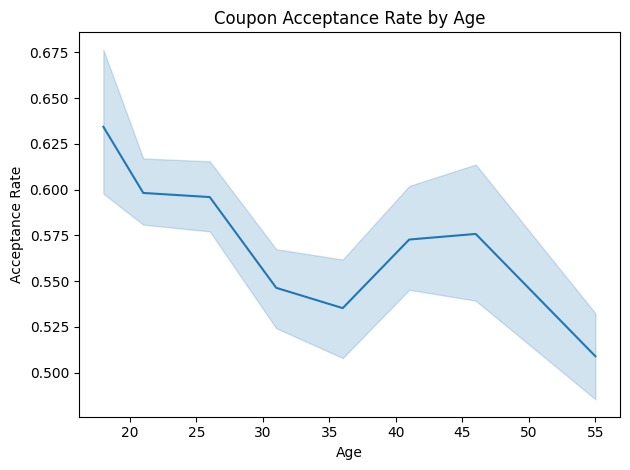

In [424]:
sns.lineplot(x='age_numeric', y='y', data=data)
plt.title('Coupon Acceptance Rate by Age')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

Observation: Age and cupons acceptance rate are inversely corelated.

11. Getting top Ocupations that are using Bar Cupons


In [425]:
# Getting top occupations that are using Bar Cupons
dataFrame_bar_group_by_occupation = dataFrame_Bar.groupby('occupation')['y'].sum().sort_values(ascending=False)
dataFrame_bar_group_by_occupation = dataFrame_bar_group_by_occupation.reset_index()
fig = px.bar(dataFrame_bar_group_by_occupation, x='occupation', y='y',
             labels={'occupation': 'Occupation', 'y': 'Coupon Acceptances'},
             title='Bar Coupon Acceptance by Occupation')

fig.show()

# Observation that Student, Unemployed are top Occupations are most cuponse accepted

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Restaurant(20-50) Coupons**

1. Create a new `DataFrame` that contains just the Restaurant(20-50) House coupons.




In [426]:
  dataFrame_restaurant_20_50 = data[data['coupon'] == 'Restaurant(20-50)']
  dataFrame_restaurant_20_50

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalstatus,...,direction_same,direction_opp,y,income_numeric,age_numeric,restaurantlessthan20_numeric,restaurant20to50_numeric,bar_numeric,coffeehouse_numeric,carryaway_numeric
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,0,1,1,43750,21,6.0,2.0,0.0,0.0,2.0
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,0,1,1,43750,21,6.0,2.0,0.0,0.0,2.0
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,0,1,0,68750,21,6.0,0.5,0.0,0.5,6.0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,0,1,0,68750,21,6.0,0.5,0.0,0.5,6.0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,0,1,0,18750,46,2.0,0.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,1,0,0,110000,31,9.0,0.5,0.5,0.0,6.0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,1,0,0,110000,31,9.0,0.5,0.5,0.0,6.0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,0,1,1,81250,26,6.0,2.0,0.0,0.0,2.0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,1,0,1,81250,26,6.0,2.0,0.0,0.0,2.0


2. What proportion of Restaurant(20-50)

In [427]:
  dataFrame_restaurant_20_50['y'].value_counts(normalize=True)
# Total Y =1 is 0.558981 and 0.441019 didnt accept the cupon

,proportion
y,
0,0.558981
1,0.441019


3. Getting the Occupation for using Restaurant(20-50) cupons

In [428]:
# Getting top Occupations that are using Restaurant(20-50) Cupons
dataFrame_restaurant_20_50_group_by_occupation = dataFrame_restaurant_20_50.groupby('occupation')['y'].sum().sort_values(ascending=False)
dataFrame_restaurant_20_50_group_by_occupation = dataFrame_restaurant_20_50_group_by_occupation.reset_index()
fig = px.bar(dataFrame_restaurant_20_50_group_by_occupation, x='occupation', y='y',
             labels={'occupation': 'Occupation', 'y': 'Coupon Acceptances'},
             title='Restaurant(20-50) Coupon Acceptance by Occupation')

fig.show()

## Found Computer & Mathematical is top ocupation when compared to Bar Coupon the top is Student


 4. Getting the Age, Income group for using Restaurant(20-50) cupons


In [429]:
dataFrame_restaurant_20_50_group_by_age = dataFrame_restaurant_20_50.groupby('age_numeric')['y'].sum().sort_values(ascending=False)
dataFrame_restaurant_20_50_group_by_age = dataFrame_restaurant_20_50_group_by_age.reset_index()
fig = px.bar(dataFrame_restaurant_20_50_group_by_age, x='age_numeric', y='y',
             labels={'age': 'age', 'y': 'Total Coupons Accepted'},
             title='Restaurant(20-50) Coupon Acceptance by Age')

fig.show()

In [430]:
dataFrame_restaurant_20_50_group_by_income = dataFrame_restaurant_20_50.groupby('income_numeric')['y'].sum().sort_values(ascending=False)
dataFrame_restaurant_20_50_group_by_income = dataFrame_restaurant_20_50_group_by_income.reset_index()
fig = px.bar(dataFrame_restaurant_20_50_group_by_income, x='income_numeric', y='y',
             labels={'age': 'age', 'y': 'Total Coupons Accepted'},
             title='Restaurant(20-50) Coupon Acceptance by Income')

fig.show()

In [431]:
dataFrame_restaurant_20_50_group_by_gender = dataFrame_restaurant_20_50.groupby('time')['y'].sum().sort_values(ascending=False)
dataFrame_restaurant_20_50_group_by_gender = dataFrame_restaurant_20_50_group_by_gender.reset_index()
fig = px.bar(dataFrame_restaurant_20_50_group_by_gender, x='time', y='y',
             labels={'age': 'age', 'y': 'Total Coupons Accepted'},
             title='Restaurant(20-50) Coupon Acceptance by Time')

fig.show()
# 6 PM, 7 AM are top 2 to accept top 2

6. Compare the acceptance rates between those drivers who:

- go to Restaurant20To50 more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to Restaurant20To50 more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [432]:
# lets define a these conditions as 3 different groups
# Group a = go to Restaurant20To50 more than once a month, had passengers that were not a kid, and were not widowed
group_a_df = dataFrame_restaurant_20_50.query(
    "restaurant20to50_numeric > 1 and passanger != 'Kid(s)' and maritalstatus != 'Widowed'"
)
# .47 Acceptance rate

# Group b = go to Restaurant20To50 more than once a month and are under the age of 30

group_b_df = dataFrame_restaurant_20_50.query("restaurant20to50_numeric > 1 and age_numeric < 30")
# .6 Acceptance rate

# Group c = go to cheap restaurants more than 4 times a month and income is less than 50K.
group_c_df = dataFrame_restaurant_20_50.query(
    "restaurantlessthan20_numeric > 4 and income_numeric > 50000"
)
# .49 Acceptance rate
# combine all the data frames and drop duplicates
combined_df = pd.concat([group_a_df, group_b_df, group_c_df]).drop_duplicates()
#combined_df = group_a_df

accept_rate_combined = combined_df['y'].mean()
accept_rate_others = dataFrame_Bar[~dataFrame_Bar.index.isin(combined_df.index)]['y'].mean()
# Acceptance rate is .5889 to .2981

print(f"Combined group acceptance rate: {accept_rate_combined}")
print(f"Other group acceptance rate: {accept_rate_others}")
comparison_df = pd.DataFrame({
    'Group': ['Satisfies any condition (A, B, C)', 'Others'],
    'Acceptance Rate': [accept_rate_combined, accept_rate_others]
})

fig = px.bar(
    comparison_df,
    x='Group',
    y='Acceptance Rate',
    text=comparison_df['Acceptance Rate'],
    title='Coupon Acceptance Rate: Condition A/B/C vs Others'
)

fig.show()

Combined group acceptance rate: 0.5387149917627677
Other group acceptance rate: 0.41001487357461575


Observations: Based on previous observations, the acceptance rate for the below categories is high for Restaurant20To50 coupons



1. Divers who go to Restaurant20To50 more than once per month and dont have a Kid's passenger and were not widowed
2. Drivers who are less than 30 years old and frequent Restaurant20To50 goers
3. Frequent fast food with income <$50k.
4. Frequent Restaurant20To50 goers with occupation of "Computer Mathematical"
5. Frequent Restaurant 20- 50 goers with Destination is "No Urgent Place"
6. Divers who go to Restaurant20To50 more than once per month, or Marital Status "Single", "Married partner".
7. Divers who go to Restaurant20To50 more than once per month and have occupations of "Computer Mathematical", "Student", and "Unemployed" have the highest acceptance rate.

# Investigating the Coffee House Coupons



Compare the acceptance rates between those drivers who:
go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed OR
go to Coffee House more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

In [433]:
# lets define a these conditions as 3 different groups
# Group a = go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed

dataFrame_CoffeeHouse = data[data['coupon'] == 'Coffee House']
group_a_df = dataFrame_CoffeeHouse.query(
    "coffeehouse_numeric > 1 and passanger != 'Kid(s)' and maritalstatus != 'Widowed'"
)
# Observaltion .66 Acceptance rate

# Group b = go to Coffee House more than once a month and are under the age of 30

group_b_df = dataFrame_CoffeeHouse.query("coffeehouse_numeric > 1 and age_numeric < 30")
# Observaltion .68 Acceptance rate

# Group c = go to 20 to 50 Restaurnets more than 4 times a month and income is less than 50K.
group_c_df = dataFrame_CoffeeHouse.query(
    "restaurant20to50_numeric > 4 and income_numeric < 50000"
)
# Observaltion .7034 Acceptance rate

# combine all the data frames and drop duplicates
combined_df = pd.concat([group_a_df, group_b_df, group_c_df]).drop_duplicates()

accept_rate_combined = combined_df['y'].mean()
accept_rate_others = dataFrame_Bar[~dataFrame_Bar.index.isin(combined_df.index)]['y'].mean()
# Acceptance rate is .6641 to .4100

print(f"Combined group acceptance rate: {accept_rate_combined}")
print(f"Other group acceptance rate: {accept_rate_others}")
comparison_df = pd.DataFrame({
    'Group': ['Satisfies any condition (A, B, C)', 'Others'],
    'Acceptance Rate': [accept_rate_combined, accept_rate_others]
})

fig = px.bar(
    comparison_df,
    x='Group',
    y='Acceptance Rate',
    text=comparison_df['Acceptance Rate'],
    title='Coupon Acceptance Rate: Condition A/B/C vs Others'
)

fig.show()

Combined group acceptance rate: 0.6641909814323608
Other group acceptance rate: 0.41001487357461575


Observations: Based on previous observations, the acceptance rate for the below categories is high for Restaurant20To50 coupons if any of the below criteria match
1. Divers who go to Coffee House more than once per month and dont have a Kid's passenger and were not widowed.
2. Drivers who are less than 30 years old and frequent Coffee House goers.
3. Drivers who go to Restaurant20To50 more than 4 times and have an income of less than $65K.




# Overall Data Analysis

Acceptance rate by Income for all the cupons.

In [434]:
acceptance_by_income = data.groupby('income')['y'].mean().reset_index()
acceptance_by_income


,income,y
0,$100000 or More,0.578341
1,$12500 - $24999,0.574549
2,$25000 - $37499,0.593145
3,$37500 - $49999,0.563989
4,$50000 - $62499,0.595539
5,$62500 - $74999,0.527187
6,$75000 - $87499,0.483081
7,$87500 - $99999,0.531844
8,Less than $12500,0.593090


Observations: The income ranges of $ 25,000 - $ 37,499 and $ 50,000 - $ 62,499 have the highest acceptance rate.

Correlation Heatmap to understand the relationship between numerical values.


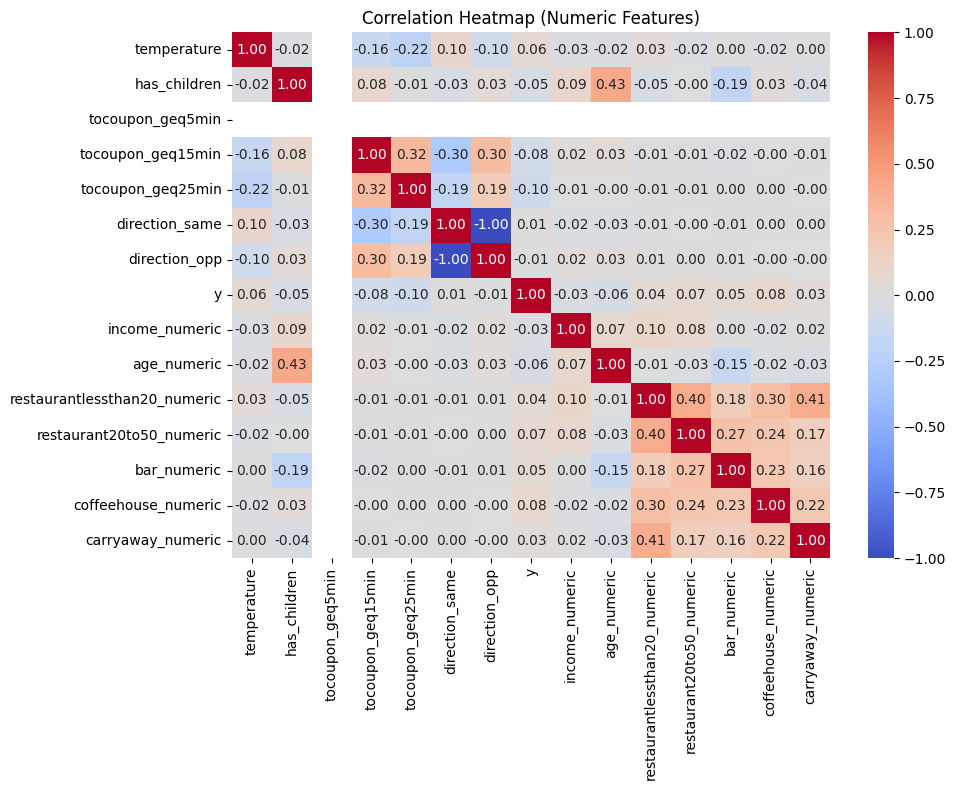

In [435]:
correlation_matrix = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

observations:
*  toCupon_GEQ5Min is empty since it has a constant value in the data provided.
* Coupon distance negatively correlates with acceptance.



# Final Acceptance rate for all the types of coupons





/tmp/ipython-input-436-156885243.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




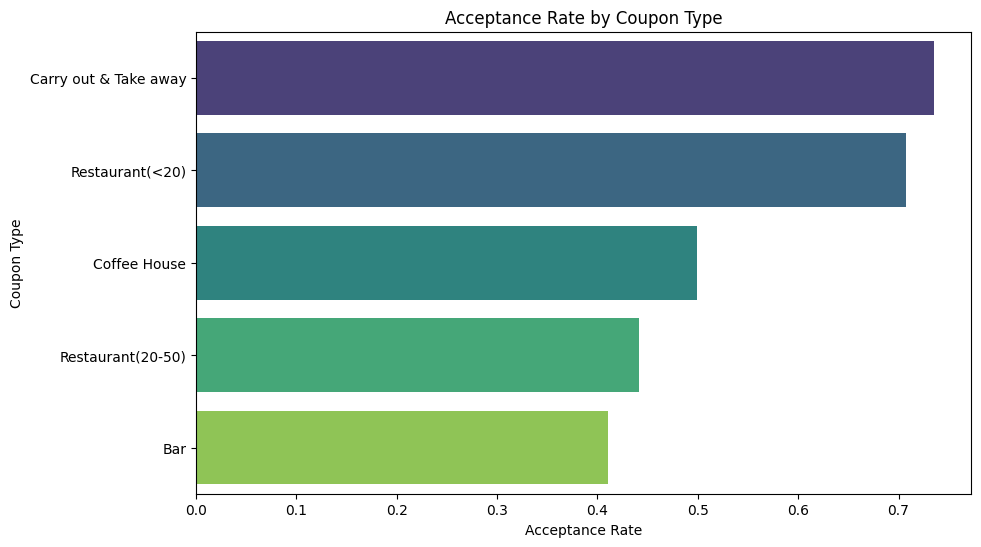

coupon
Carry out & Take away    0.735478
Restaurant(<20)          0.707107
Coffee House             0.499249
Restaurant(20-50)        0.441019
Bar                      0.410015
Name: y, dtype: float64


In [436]:
# To get an idea we can get acceptance rate for all types of cupons
#Group and calculate acceptance rate for each coupon type
coupon_acceptance_rates = data.groupby('coupon')['y'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=coupon_acceptance_rates.values,
    y=coupon_acceptance_rates.index,
    palette="viridis"
)

plt.title("Acceptance Rate by Coupon Type")
plt.xlabel("Acceptance Rate")
plt.ylabel("Coupon Type")
plt.show()

# Print acceptance rates for reference
print(coupon_acceptance_rates)

# Key Takeaways
* Found the Carry out & Take Away, Restaurent (<20) have highest acceptance rate. That strengthens the notion that low-cost and quick-service food coupons perform best.
* The younger age group <30 has a higher acceptance rate.
* Occupations of Students, Unemployed, and Computer & Mathematical have a high acceptance rate.
* People with friends have accepted coupons the most.
* Sunny weather leads to a higher acceptance rate compared to snow and rainy conditions
* The income range of low and medium $25K - $62.5K, has the highest acceptance rate.
* Coupon distance negatively correlates with acceptance.